# Social Network Analysis: Reddit

This project analyzes user interactions within a specific Reddit thread from the subreddit `r/KGATLW`. Utilizing network analysis, the study maps these interactions into a directed graph, revealing a network with moderate clustering and distinct community structures. Key metrics such as centrality identify influential users, while link prediction techniques forecast potential future interactions. The findings provide insights into community dynamics, offering valuable information for enhancing engagement and understanding social interactions on Reddit.

In [1]:
!pip install praw networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 2.8 MB/s eta 0:00:00


In [2]:
import praw
import json

# Accessing to Reddit

## Extracting comments

In [3]:
# Connect to Reddit
reddit = praw.Reddit(
    user_agent="Comment Extraction (by /u/tusken_1737)",
    client_id="4rAJFDSud_c0CSQjJeDeEg",
    client_secret="qQPzAtqLptb64wAz_Fe6NMCWLaTEBg"
)

# URL of the Reddit post
url = "https://www.reddit.com/r/KGATLW/comments/vftri5/alright_gizzers_lets_hear_it/"
submission = reddit.submission(url=url)

# Extract comments
posts = []
try:
    submission.comments.replace_more(limit=None)
    for top_level_comment in submission.comments:
        posts.append({
            "user": top_level_comment.author.name if top_level_comment.author else "Unknown",
            "body": top_level_comment.body,
            "parent_id": top_level_comment.parent_id
        })
        for reply in top_level_comment.replies:
            posts.append({
                "user": reply.author.name if reply.author else "Unknown",
                "body": reply.body,
                "parent_id": reply.parent_id
            })
except Exception as e:
    print(f"An error occurred: {e}")

# Save comments to a JSON file
with open('comments.json', 'w', encoding='utf-8') as f:
    json.dump(posts, f, ensure_ascii=False, indent=4)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

# Network Creation

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
# Load comments from JSON file
with open('comments.json', 'r', encoding='utf-8') as f:
    comments = json.load(f)

# Filter out removed and deleted comments
filtered_comments = [comment for comment in comments if comment['body'] not in ['[removed]', '[deleted]']]

## Network Visuailzation

In [6]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for comment in filtered_comments:
    user = comment['user']
    parent_id = comment['parent_id']
    if not G.has_node(user):
        G.add_node(user)
    if parent_id.startswith('t1_'):
        parent_comment = next((c for c in filtered_comments if c['parent_id'] == parent_id), None)
        if parent_comment:
            parent_user = parent_comment['user']
            if not G.has_node(parent_user):
                G.add_node(parent_user)
            G.add_edge(parent_user, user)

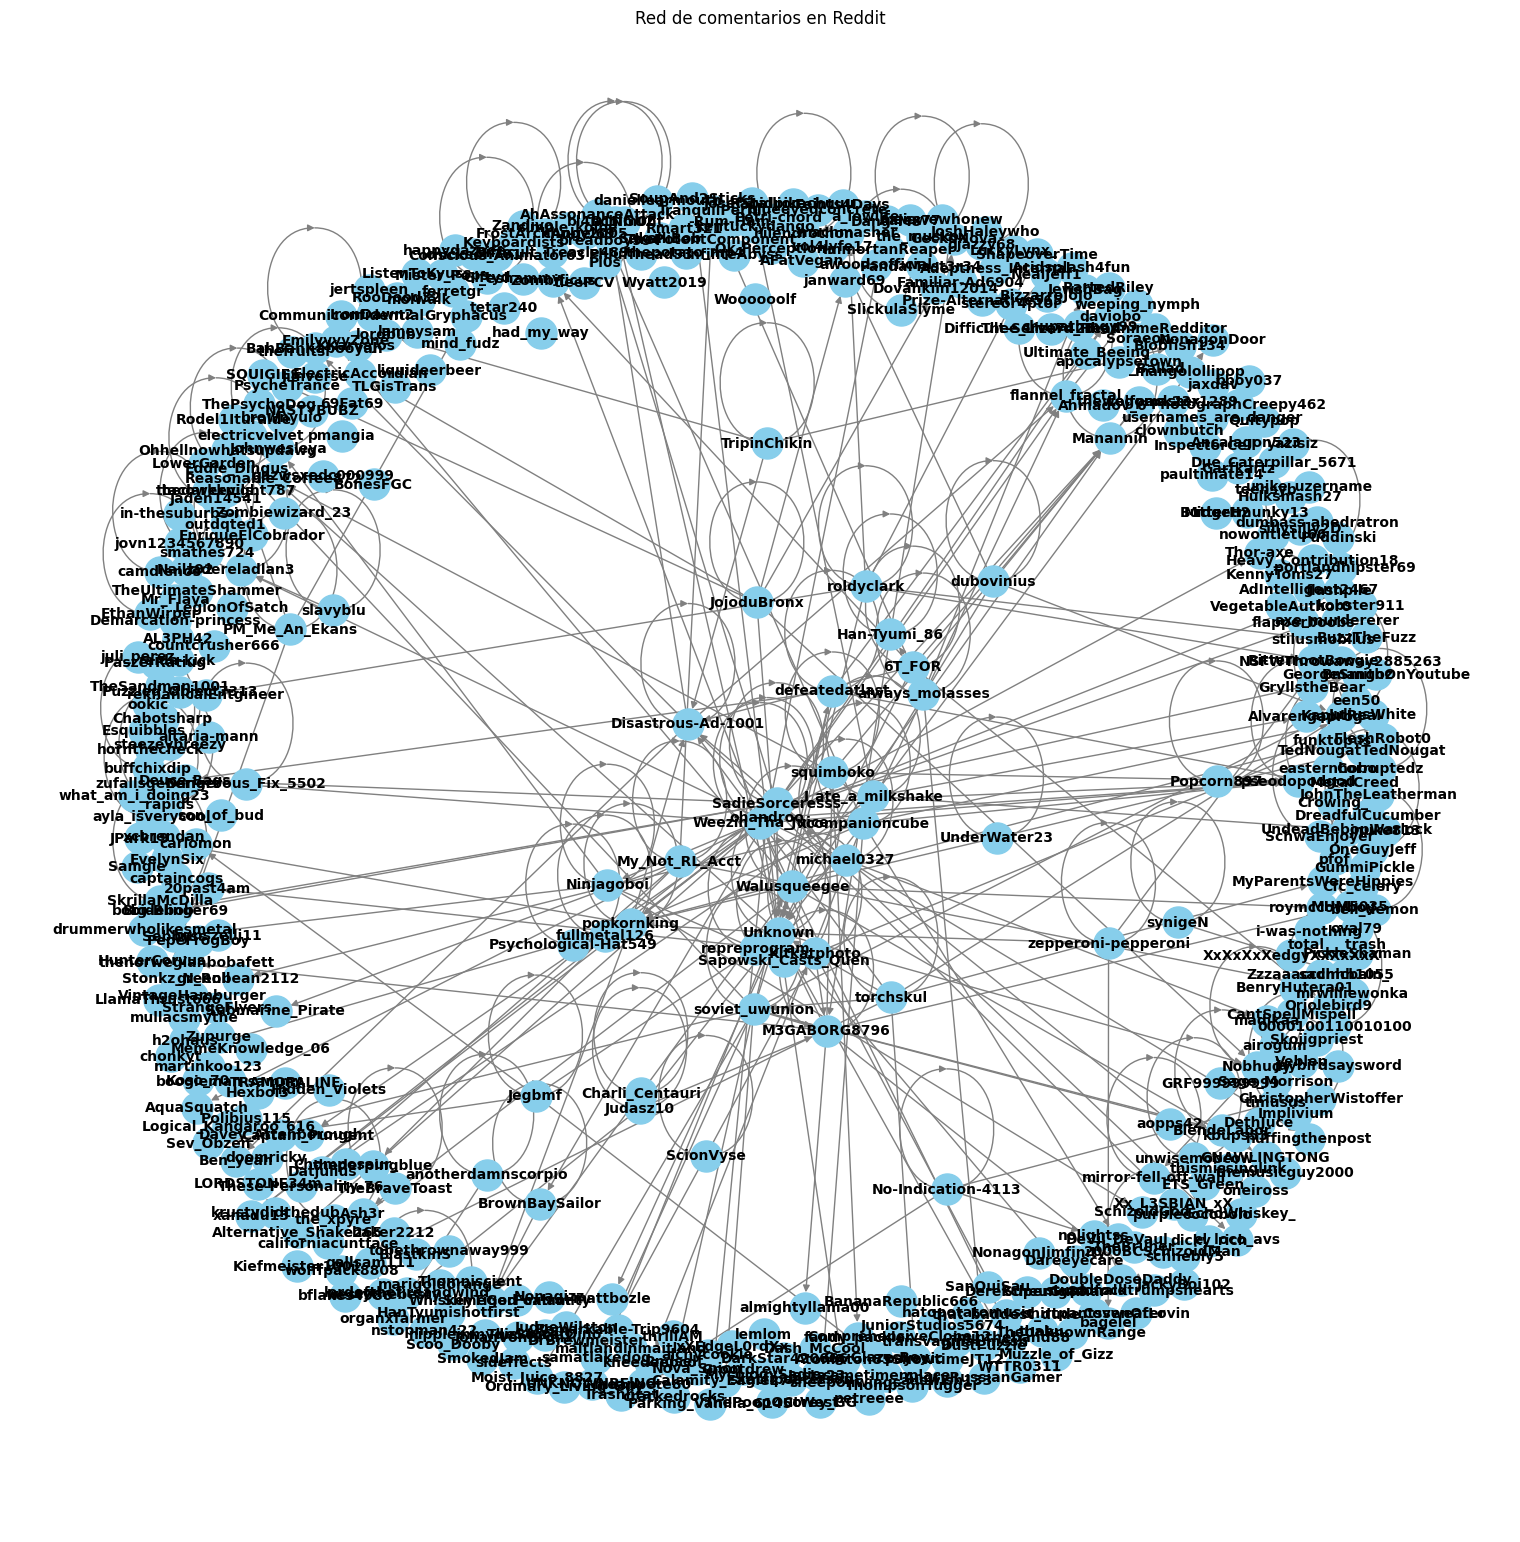

In [7]:
# Plot the network
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.1, iterations=50)

nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Red de comentarios en Reddit")
plt.show()

## Basic Characteristics

In [8]:
network_type = type(G).__name__
network_type

'DiGraph'

In [9]:
degree_distribution = dict(G.degree())
degree_distribution

{'pmangia': 0,
 'Jegbmf': 6,
 'Sev_Obzen': 2,
 'Unknown': 26,
 'ThompsonTugger': 1,
 'carlomon': 1,
 'lameysam': 0,
 'bagelel': 2,
 'Nobhudy': 6,
 'Reasonable_Coffee872': 2,
 'Petri-chord': 0,
 'Disastrous-Ad-1001': 12,
 'Derekcheung88': 0,
 'buffchixdip': 2,
 'purplecocobolo': 0,
 'Walusqueegee': 11,
 'roymccowboy': 1,
 'UNKNOWNBElNG': 1,
 'Manannin': 7,
 'GNAWLINGTONG': 1,
 'EmilyyyyZone': 1,
 'californiacuntface': 1,
 'DreadfulCucumber': 0,
 'flannel_fractal': 6,
 'Alvarengaprog': 1,
 'I_ate_a_milkshake': 8,
 'kneedeepco': 1,
 'These-Personality-76': 1,
 'UndeadBebopWarlock': 1,
 'kentuckydango': 1,
 'NonagonDoor': 1,
 'machmasher': 1,
 'jovn1234567890': 0,
 'paultimate14': 0,
 'yazisiz': 0,
 'SkrillaMcDilla': 3,
 'drummerwholikesmetal': 1,
 'TheBruher': 0,
 '0000100110010100': 2,
 'SakalliBob': 0,
 'SadieSorceresss': 14,
 'Big-Blinger69': 1,
 'Bmangoz': 1,
 'xanadu13': 2,
 'bobidebob': 1,
 'daviobo': 2,
 'Deuce-Bags': 4,
 'el_loco_avs': 1,
 'oneiross': 1,
 'AhAssonanceAttack': 2,
 

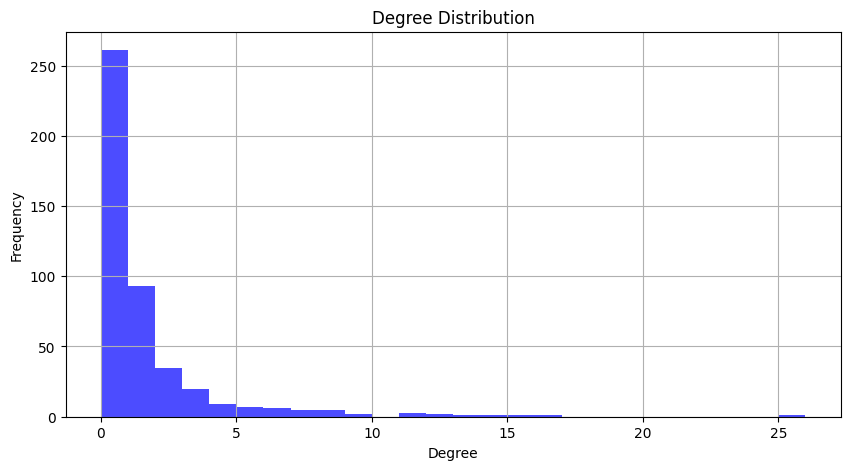

In [10]:
# Degree Distribution Plotting
degrees = [degree for node, degree in G.degree()]
plt.figure(figsize=(10, 5))
plt.hist(degrees, bins=max(degrees)-min(degrees), color='blue', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
global_clustering_coefficient = nx.average_clustering(G.to_undirected())
global_clustering_coefficient

0.004035529474631115

In [12]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'pmangia': 0.0,
 'Jegbmf': 0.01327433628318584,
 'Sev_Obzen': 0.004424778761061947,
 'Unknown': 0.05752212389380531,
 'ThompsonTugger': 0.0022123893805309734,
 'carlomon': 0.0022123893805309734,
 'lameysam': 0.0,
 'bagelel': 0.004424778761061947,
 'Nobhudy': 0.01327433628318584,
 'Reasonable_Coffee872': 0.004424778761061947,
 'Petri-chord': 0.0,
 'Disastrous-Ad-1001': 0.02654867256637168,
 'Derekcheung88': 0.0,
 'buffchixdip': 0.004424778761061947,
 'purplecocobolo': 0.0,
 'Walusqueegee': 0.024336283185840708,
 'roymccowboy': 0.0022123893805309734,
 'UNKNOWNBElNG': 0.0022123893805309734,
 'Manannin': 0.015486725663716814,
 'GNAWLINGTONG': 0.0022123893805309734,
 'EmilyyyyZone': 0.0022123893805309734,
 'californiacuntface': 0.0022123893805309734,
 'DreadfulCucumber': 0.0,
 'flannel_fractal': 0.01327433628318584,
 'Alvarengaprog': 0.0022123893805309734,
 'I_ate_a_milkshake': 0.017699115044247787,
 'kneedeepco': 0.0022123893805309734,
 'These-Personality-76': 0.0022123893805309734,
 'Und

In [13]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{'pmangia': 0.0,
 'Jegbmf': 0.0,
 'Sev_Obzen': 0.0,
 'Unknown': 0.0020803491421881233,
 'ThompsonTugger': 0.0,
 'carlomon': 0.0,
 'lameysam': 0.0,
 'bagelel': 0.0,
 'Nobhudy': 0.00023546494515628986,
 'Reasonable_Coffee872': 0.0,
 'Petri-chord': 0.0,
 'Disastrous-Ad-1001': 0.0008633714655730628,
 'Derekcheung88': 0.0,
 'buffchixdip': 0.0,
 'purplecocobolo': 0.0,
 'Walusqueegee': 0.00024159684476973491,
 'roymccowboy': 0.0,
 'UNKNOWNBElNG': 0.0,
 'Manannin': 6.37717559798285e-05,
 'GNAWLINGTONG': 0.0,
 'EmilyyyyZone': 0.0,
 'californiacuntface': 0.0,
 'DreadfulCucumber': 0.0,
 'flannel_fractal': 0.0001520711104134372,
 'Alvarengaprog': 0.0,
 'I_ate_a_milkshake': 0.0,
 'kneedeepco': 0.0,
 'These-Personality-76': 0.0,
 'UndeadBebopWarlock': 0.0,
 'kentuckydango': 0.0,
 'NonagonDoor': 0.0,
 'machmasher': 0.0,
 'jovn1234567890': 0.0,
 'paultimate14': 0.0,
 'yazisiz': 0.0,
 'SkrillaMcDilla': 0.0,
 'drummerwholikesmetal': 0.0,
 'TheBruher': 0.0,
 '0000100110010100': 0.0,
 'SakalliBob': 0.0,
 

In [14]:
# Clustering Coefficient Calculation
local_clustering_coefficients = nx.clustering(G.to_undirected())  # Need to convert to undirected for clustering coefficient
local_clustering_coefficients

{'pmangia': 0,
 'Jegbmf': 0,
 'Sev_Obzen': 0,
 'Unknown': 0.018115942028985508,
 'ThompsonTugger': 0,
 'carlomon': 0,
 'lameysam': 0,
 'bagelel': 1.0,
 'Nobhudy': 0,
 'Reasonable_Coffee872': 0,
 'Petri-chord': 0,
 'Disastrous-Ad-1001': 0,
 'Derekcheung88': 0,
 'buffchixdip': 0,
 'purplecocobolo': 0,
 'Walusqueegee': 0,
 'roymccowboy': 0,
 'UNKNOWNBElNG': 0,
 'Manannin': 0,
 'GNAWLINGTONG': 0,
 'EmilyyyyZone': 0,
 'californiacuntface': 0,
 'DreadfulCucumber': 0,
 'flannel_fractal': 0,
 'Alvarengaprog': 0,
 'I_ate_a_milkshake': 0,
 'kneedeepco': 0,
 'These-Personality-76': 0,
 'UndeadBebopWarlock': 0,
 'kentuckydango': 0,
 'NonagonDoor': 0,
 'machmasher': 0,
 'jovn1234567890': 0,
 'paultimate14': 0,
 'yazisiz': 0,
 'SkrillaMcDilla': 0,
 'drummerwholikesmetal': 0,
 'TheBruher': 0,
 '0000100110010100': 0,
 'SakalliBob': 0,
 'SadieSorceresss': 0,
 'Big-Blinger69': 0,
 'Bmangoz': 0,
 'xanadu13': 0,
 'bobidebob': 0,
 'daviobo': 0,
 'Deuce-Bags': 0,
 'el_loco_avs': 0,
 'oneiross': 0,
 'AhAsson

# Network mapping

In [15]:
from networkx.algorithms.community import greedy_modularity_communities

In [16]:
# Load data from the JSON file
with open('/content/comments.json', 'r', encoding='utf-8') as f:
    comments = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for comment in comments:
    user = comment['user']
    parent_id = comment['parent_id']
    if not G.has_node(user):
        G.add_node(user)
    if parent_id.startswith('t1_'):
        parent_comment = next((c for c in comments if c['parent_id'] == parent_id), None)
        if parent_comment:
            parent_user = parent_comment['user']
            if not G.has_node(parent_user):
                G.add_node(parent_user)
            G.add_edge(parent_user, user)

# Calculate centrality metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Community detection
communities = list(greedy_modularity_communities(G))
community_map = {}
for i, community in enumerate(communities):
    for user in community:
        community_map[user] = i

# Node attributes
for node in G.nodes():
    G.nodes[node]['degree_centrality'] = degree_centrality[node]
    G.nodes[node]['betweenness_centrality'] = betweenness_centrality[node]
    G.nodes[node]['community'] = community_map[node]

In [17]:
import matplotlib.colors as mcolors

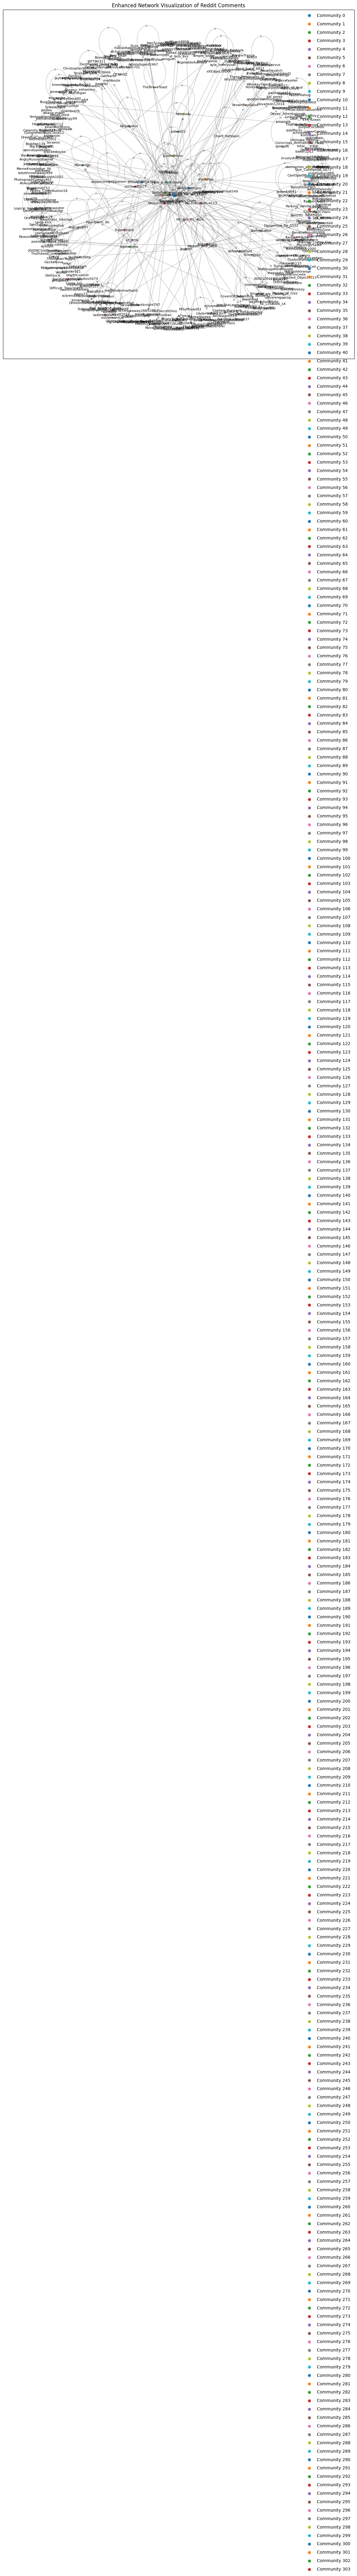

In [18]:
# Define colors for communities
colors = list(mcolors.TABLEAU_COLORS.values())

# Plot the network
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.1, iterations=50)

# Draw nodes with community colors and size based on degree centrality
node_color = [colors[G.nodes[node]['community'] % len(colors)] for node in G.nodes()]
node_size = [1000 * G.nodes[node]['degree_centrality'] for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Create a legend
legend_labels = {i: f"Community {i}" for i in range(len(communities))}
for i, label in legend_labels.items():
    plt.scatter([], [], c=colors[i % len(colors)], label=label)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper right')

plt.title("Enhanced Network Visualization of Reddit Comments")
plt.show()

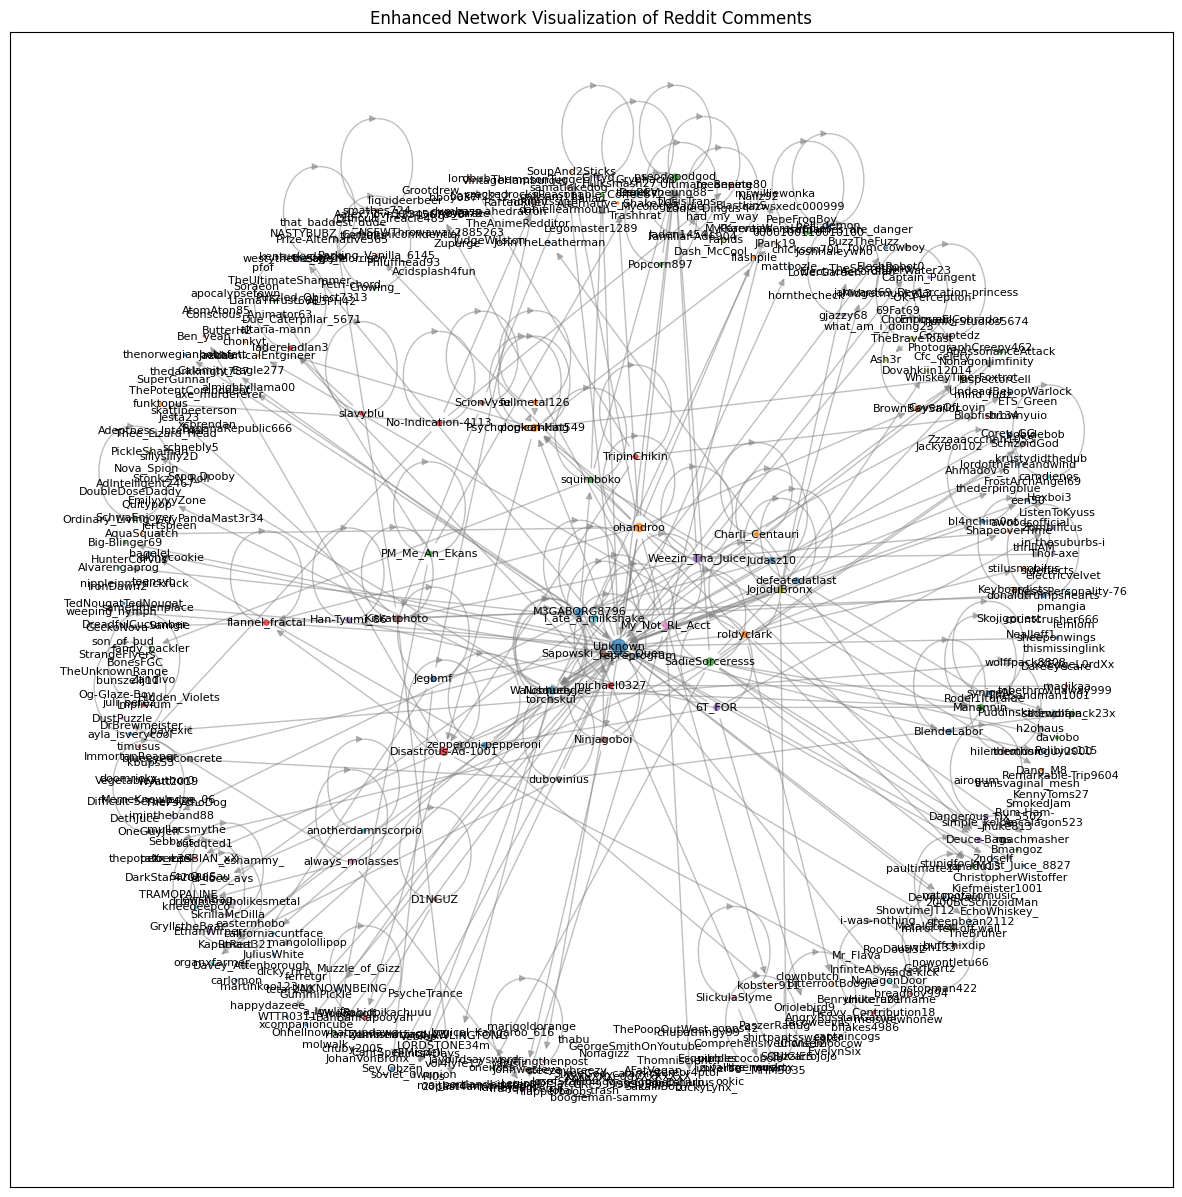

In [19]:
# Define colors for communities
colors = list(mcolors.TABLEAU_COLORS.values())

# Plot the network without legend
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.1, iterations=50)

# Draw nodes with community colors and size based on degree centrality
node_color = [colors[G.nodes[node]['community'] % len(colors)] for node in G.nodes()]
node_size = [1000 * G.nodes[node]['degree_centrality'] for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

plt.title("Enhanced Network Visualization of Reddit Comments")
plt.show()

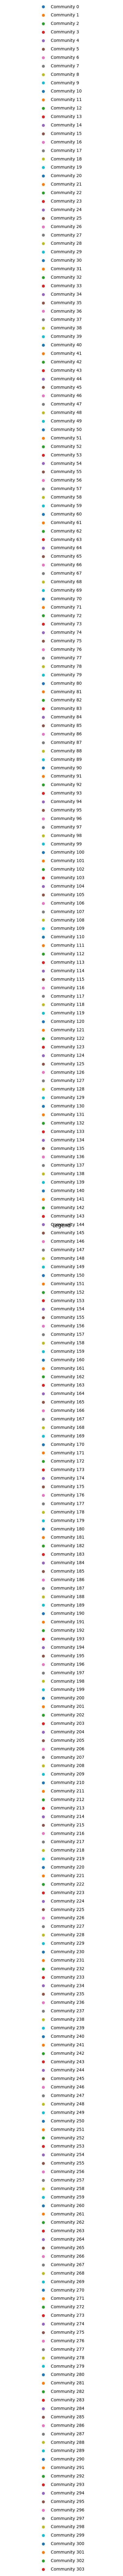

In [20]:
# Create a separate figure for the legend
plt.figure(figsize=(5, 5))
legend_labels = {i: f"Community {i}" for i in range(len(communities))}
for i, label in legend_labels.items():
    plt.scatter([], [], c=colors[i % len(colors)], label=label)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='center')
plt.axis('off')  # Hide axes
plt.title("Legend")
plt.show()